# Time-Series: Explore Exercises
### Kwame V. Taylor
Do your work for this exercise in a notebook named ```explore```. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# default viz settings
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=14)
plt.rc('lines', linewidth=2, c='m')
plt.style.use('seaborn-whitegrid')

from acquire import get_opsd_germany, get_df, merge_items_stores_sales
from prepare import prepare_stores_items, prepare_opsd_germany

## Store item demand data

### Acquire

In [2]:
# acquire the data
items = get_df('items')
stores = get_df('stores')
sales = get_df('sales')
items.head(2)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925


In [3]:
# merge into one df
df = merge_items_stores_sales(sales, stores, items)
df.head(3)

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
df = prepare_stores_items(df)
df.head(3)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55


In [5]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape of data:', df.shape)

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Shape of data: (913000, 16)


In [6]:
# resample into daily
#df.resample('D')

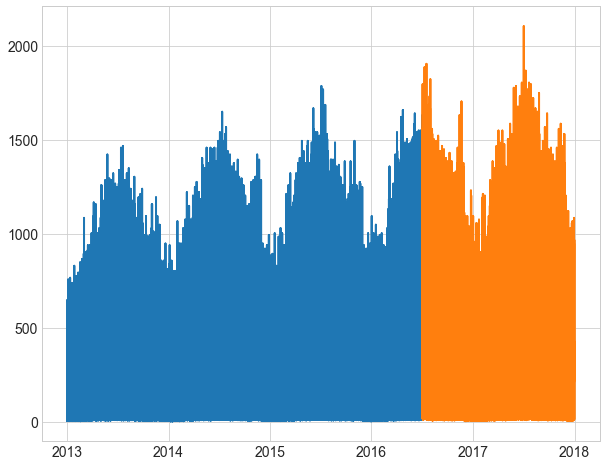

In [7]:
# split the data
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

**Takeaway:** The rise over time could be from inflation. There is a spike in sales during summers.

In [8]:
# set the y
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

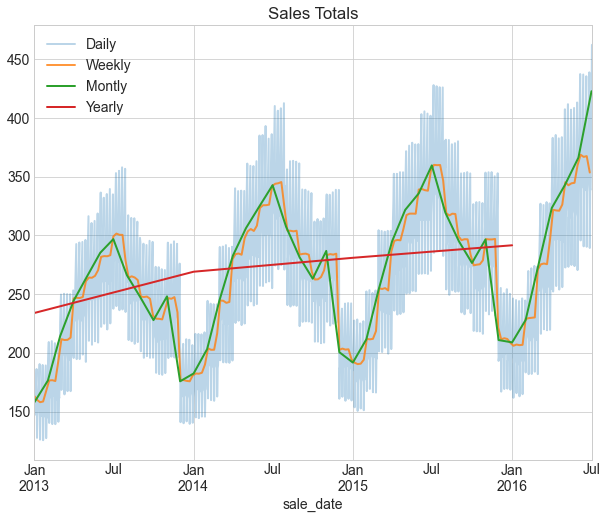

In [9]:
y.resample('D').mean().plot(alpha=.3, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.title('Sales Totals')
plt.legend()

**Takeaway:** Monthly went up more in 2016.

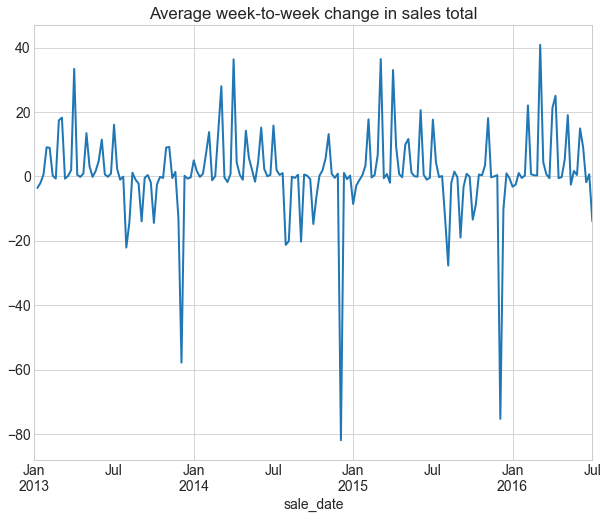

In [10]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales total')

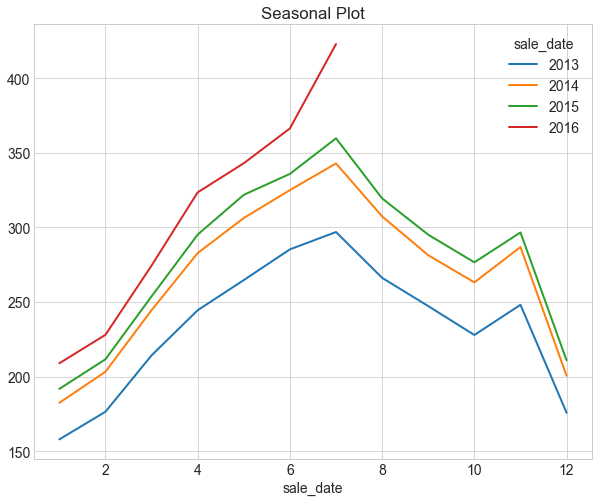

In [11]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')